In [1]:
%matplotlib inline
import numpy as np
import sklearn
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import timeit
import pandas as pd
import math
import itertools
import time

from sklearn.neighbors import (
    KernelDensity,
    KDTree,
)
from sklearn.preprocessing import (
    RobustScaler
)

In [66]:
def smart_bin(s1, s2):
    extent = (
        np.nanpercentile(s1, 1), 
        np.nanpercentile(s1, 99), 
        np.nanpercentile(s2, 1),
        np.nanpercentile(s2, 99),
    )
    plt.hexbin(s1, s2, extent=extent, gridsize=30, bins="log")

In [3]:
df = pd.read_csv("../../data/home_sensor.csv")

In [11]:
dfs = df.sample(10000)

3,4


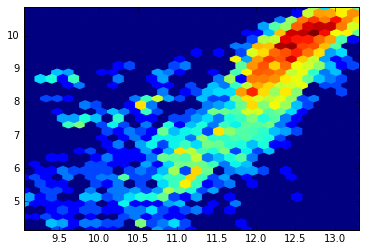

3,5


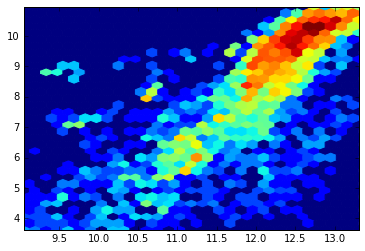

3,6


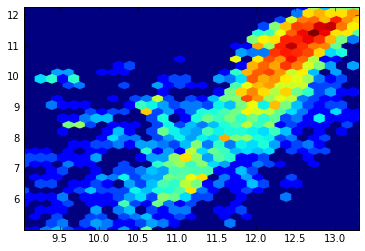

3,7


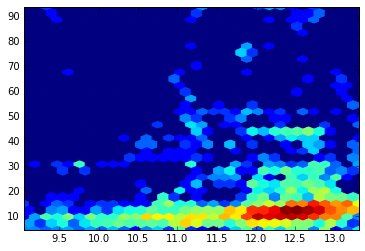

3,8


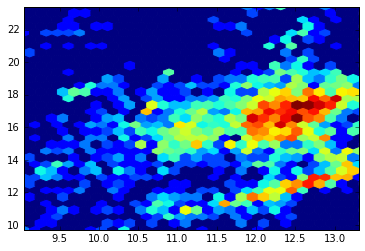

3,9


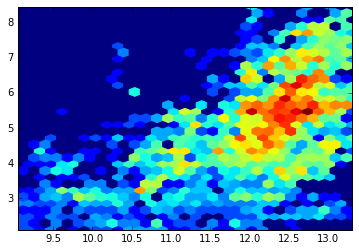

3,10


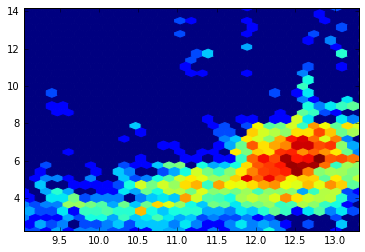

3,11


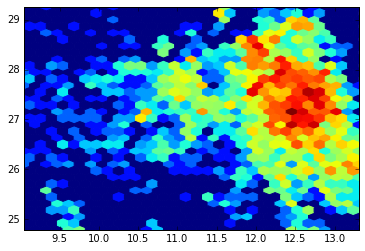

3,12


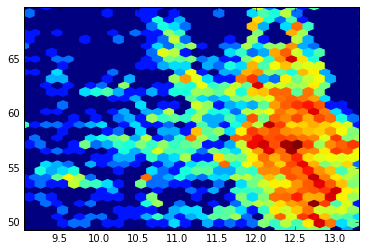

4,5


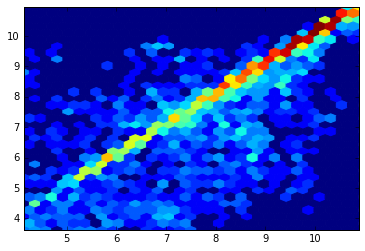

4,6


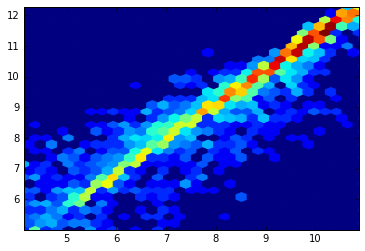

4,7


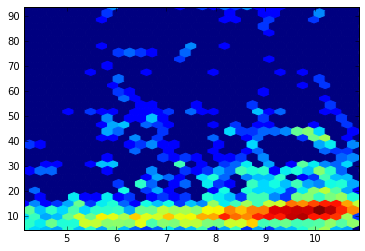

4,8


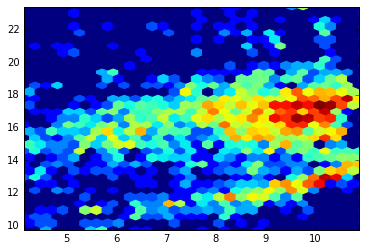

4,9


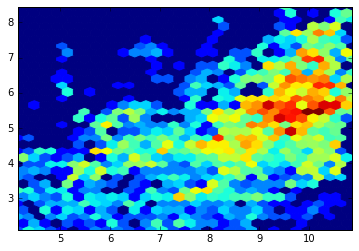

4,10


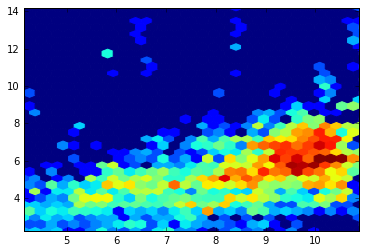

4,11


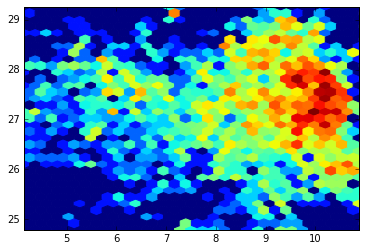

4,12


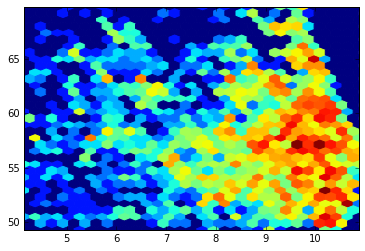

5,6


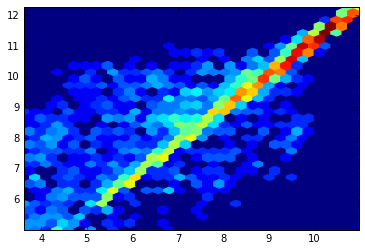

5,7


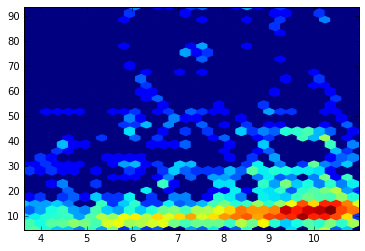

5,8


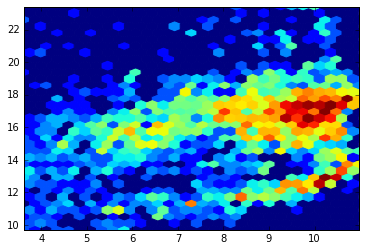

5,9


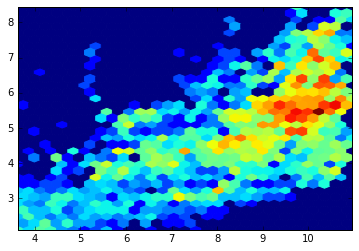

5,10


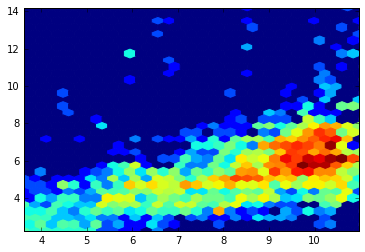

5,11


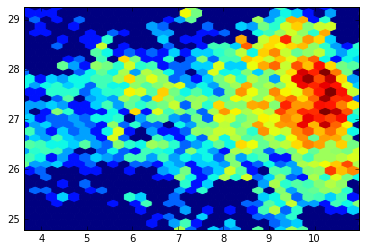

5,12


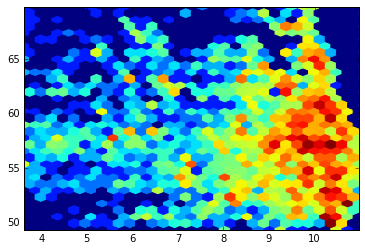

6,7


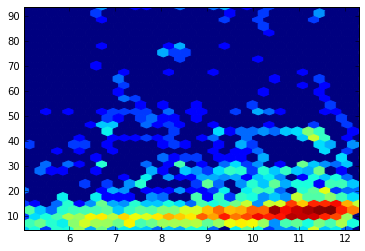

6,8


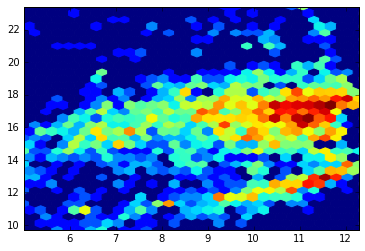

6,9


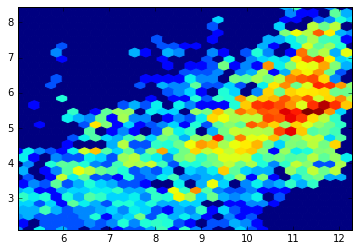

6,10


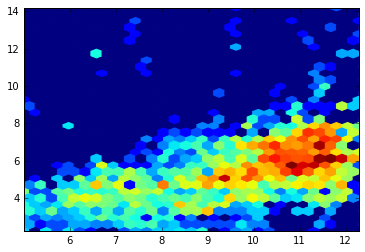

6,11


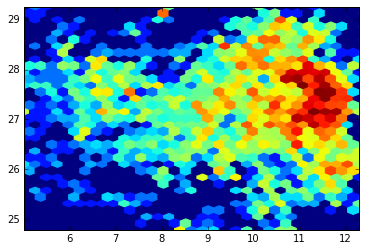

6,12


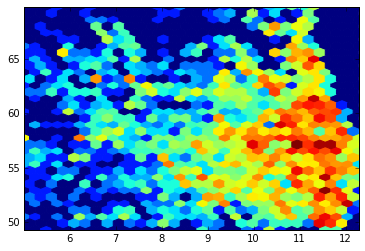

7,8


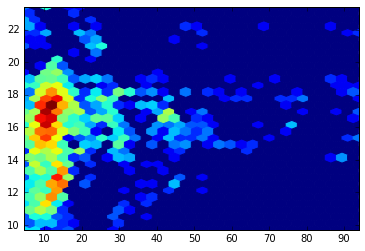

7,9


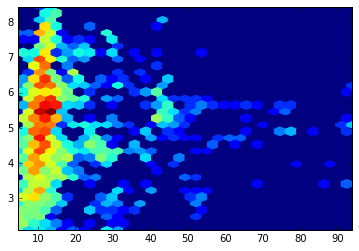

7,10


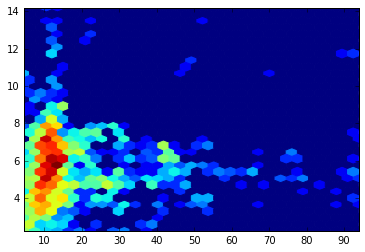

7,11


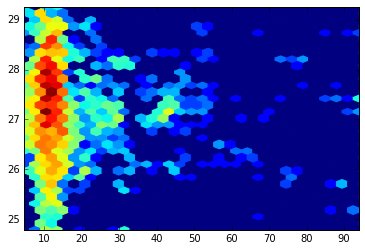

7,12


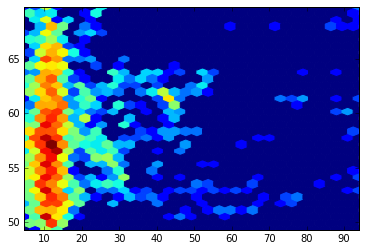

8,9


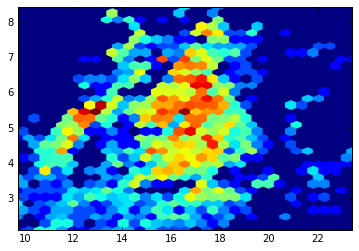

8,10


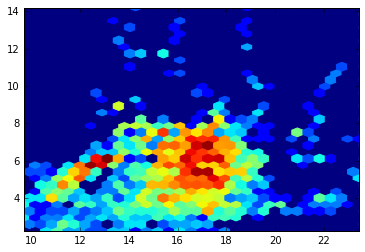

8,11


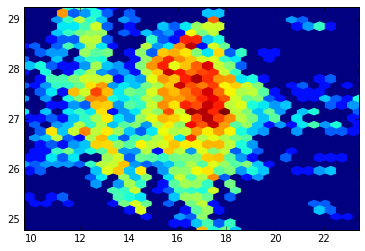

8,12


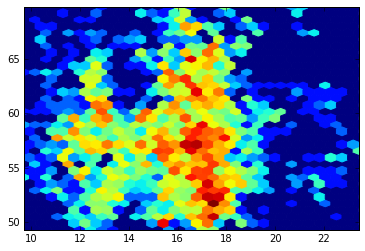

9,10


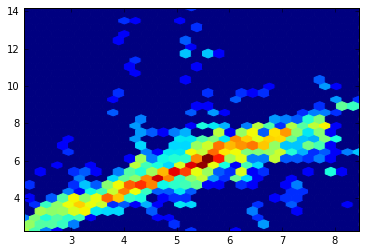

9,11


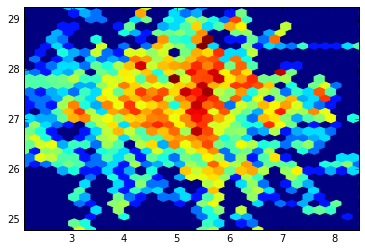

9,12


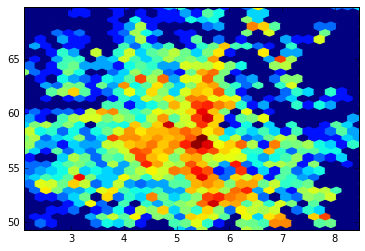

10,11


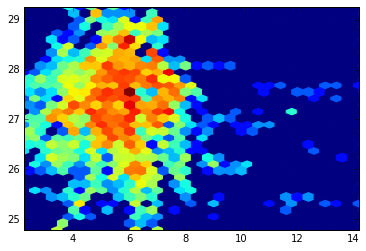

10,12


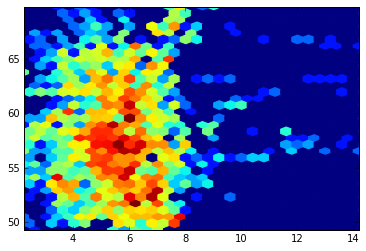

11,12


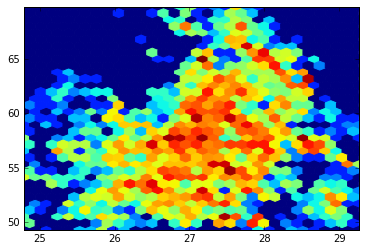

In [13]:
for i in range(3,13):
    for j in range(i+1,13):
        print("{},{}".format(i,j))
        plt.figure()
        smart_bin(dfs[[i]], dfs[[j]])
        plt.show()

# Mass Data

In [16]:
df = pd.read_csv("../rawdata/mass.csv", nrows=10000)

In [17]:
df.head()

# label        f0        f1        f2        f3        f4        f5  \
0      0.0  0.094394  0.012756  0.911933 -0.090831 -0.233575 -1.054221   
1      1.0  0.327200 -0.239554 -1.592038 -2.324984 -0.507093  1.574625   
2      1.0  1.435010  0.400359  0.260659  0.829901  0.453934 -1.054221   
3      0.0 -1.186220  0.443335  0.003997  0.484752 -1.159905 -1.054221   
4      1.0  0.392461 -0.515250 -1.336984  1.895459 -1.068731 -0.005984   

         f6        f7        f8     ...            f18       f19       f20  \
0 -0.975937 -1.067278 -0.613850     ...      -1.376865  0.067591  1.372576   
1 -1.050106  0.968664  1.312387     ...      -0.333943  1.058411  0.436482   
2  1.169220 -0.541082 -1.230714     ...      -1.654498  0.928221  0.639820   
3 -1.581964 -0.391629  0.529644     ...      -0.520804 -1.241476 -0.137923   
4  1.404694  0.176146  0.700568     ...      -0.557441  0.838925 -0.128199   

        f21       f22       f23       f24       f25       f26         mass  
0 -0.573682 -1.368692 -0.479379  1.529256 -0.575782 -1.290232   499.999969  
1 -0.573682 -0.021727 -0.579184 -0.326044 -0.202462 -0.458558   750.000000  
2 -0.573682  0.494222 -0.277551 -0.342811  1.774911  0.305253  1000.000000  
3 -0.573682 -0.254372 -0.253829  0.333148 -0.554347 -0.905452  1000.000000  
4 -0.573682 -0.629632 -0.673854 -0.238945  2.118990  0.938224  1250.000000  

[5 rows x 29 columns]

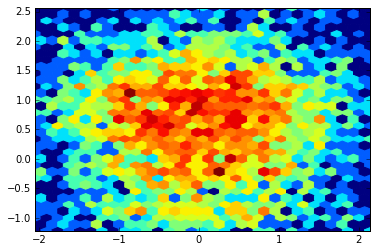

In [38]:
smart_bin(df.f7[df["# label"] == 1], df.f26[df["# label"] == 1])

# Home Energy

In [60]:
df = pd.read_csv(
    "../rawdata/household_power_consumption.txt", 
    nrows=10000, 
    sep=";",
    na_values="?",
)

In [68]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

2,3


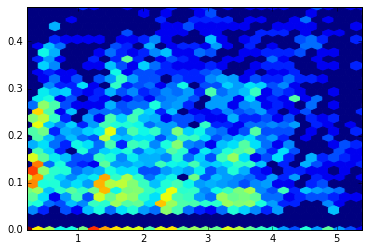

2,4


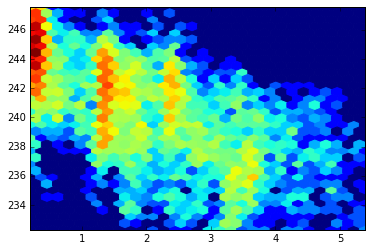

2,5


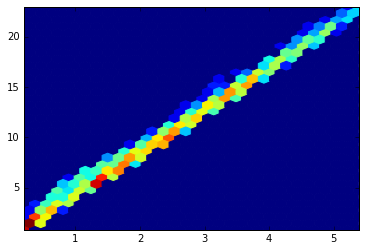

2,6


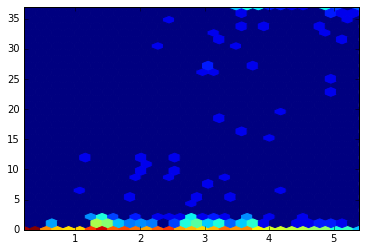

2,7


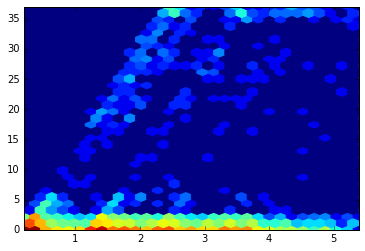

2,8


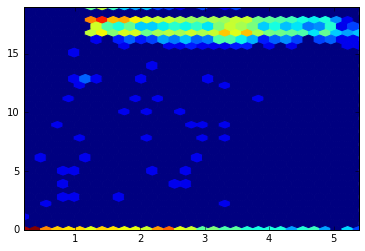

3,4


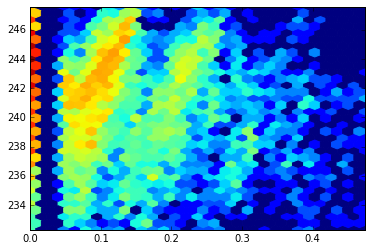

3,5


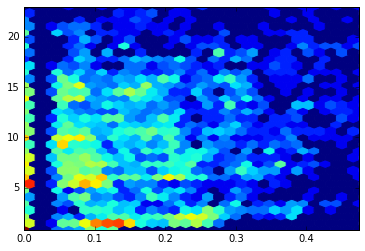

3,6


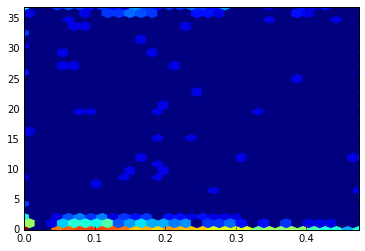

3,7


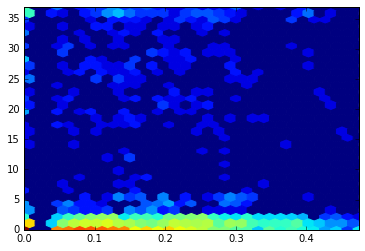

3,8


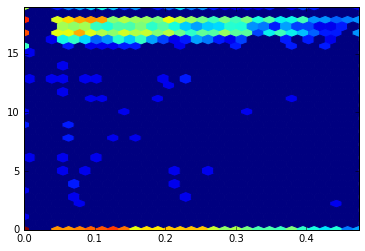

4,5


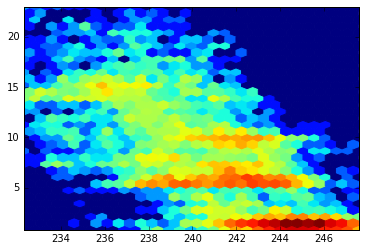

4,6


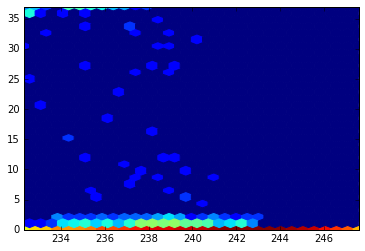

4,7


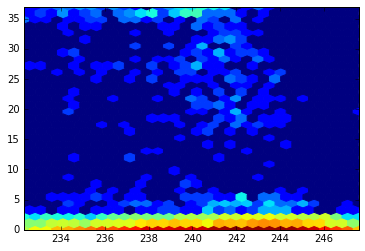

4,8


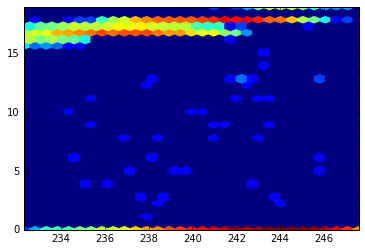

5,6


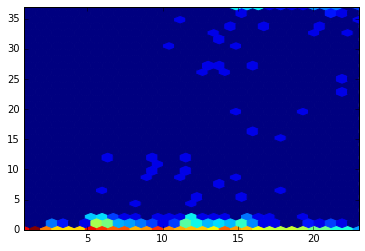

5,7


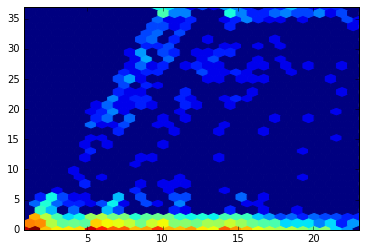

5,8


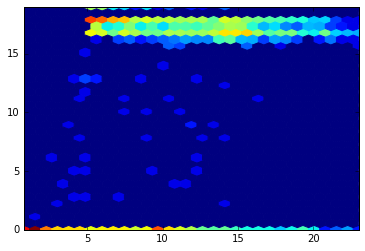

6,7


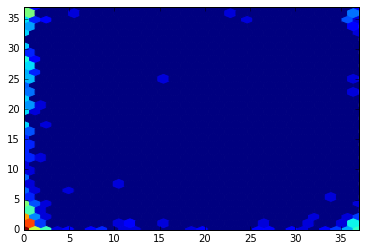

6,8


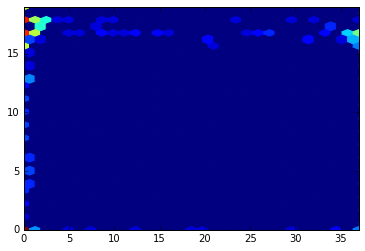

7,8


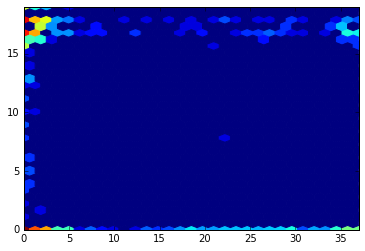

In [69]:
for i in range(2,9):
    for j in range(i+1,9):
        print("{},{}".format(i,j))
        plt.figure()
        smart_bin(df[[i]], df[[j]])
        plt.show()

# MNIST

In [84]:
import sklearn.decomposition

In [81]:
df = pd.read_csv(
    "../rawdata/mnist_train.csv",
    header=None,
).rename(
    columns={0: "label"}
)

In [83]:
df.head()

label  1  2  3  4  5  6  7  8  9 ...   775  776  777  778  779  780  781  \
0      5  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
1      0  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
2      4  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
3      1  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
4      9  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   

   782  783  784  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 785 columns]